# This model will be used to predict the salary of a player in the NBA around the years 2020-2023

# 1. Import all Libraries

In [15]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

## 1.1. Importing the Dataset

In [16]:
try:
    df = pd.read_csv("Datasets/nba2k_cleaned_v1.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
    sys.exit(1)
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    sys.exit(1)

Dataset loaded successfully.


# 2. Splitting & Preparing the Data
- Splitting the data into training and testing sets.
- Assigning the features and target variables.

In [17]:
# Prepare the X, y data
X = df.drop(columns=['salary_usd'])
y = df['salary_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 3. Linear Regression Model
- The first model to test will be a simple linear regression model.

In [18]:
# Prepare the data
X = df.drop('salary_usd', axis=1)  # Features
y = df['salary_usd']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
model_score = lr_model.score(X_test, y_test)

# Print results
print("=" * 50)
print("LINEAR REGRESSION RESULTS")
print("=" * 50)
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {1 - (1 - r2) * (len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1):.4f}")
print(f"Model Score: {model_score:.4f}")
print("=" * 50)

# Display model coefficients
print("\nFEATURE IMPORTANCE (Coefficients):")
print("=" * 30)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
feature_importance['Absolute_Impact'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Absolute_Impact', ascending=False)

print(feature_importance.to_string(index=False))

LINEAR REGRESSION RESULTS
Mean Absolute Error (MAE): $4,457,296.96
Mean Squared Error (MSE): $35,508,836,361,680.58
Root Mean Squared Error (RMSE): $5,958,929.13
R² Score: 0.7819
Adjusted R² Score: 0.7553
Model Score: 0.7819

FEATURE IMPORTANCE (Coefficients):
          Feature   Coefficient  Absolute_Impact
    version_split  3.742527e+06     3.742527e+06
           rating  1.094022e+06     1.094022e+06
      draft_round  6.682510e+05     6.682510e+05
       draft_year -6.464623e+05     6.464623e+05
position_Lencoded -1.125994e+05     1.125994e+05
        weight_kg -8.538539e+04     8.538539e+04
        height_cm  3.485987e+04     3.485987e+04
            p_age  2.333676e+04     2.333676e+04
       draft_peak -2.197248e+04     2.197248e+04
    team_Lencoded -4.901724e+03     4.901724e+03


- plot the actual vs predicted values

Linear Regression Model Summary:
Intercept: $-6,332,138,974.88
Number of features: 10
Training samples: 371
Testing samples: 93


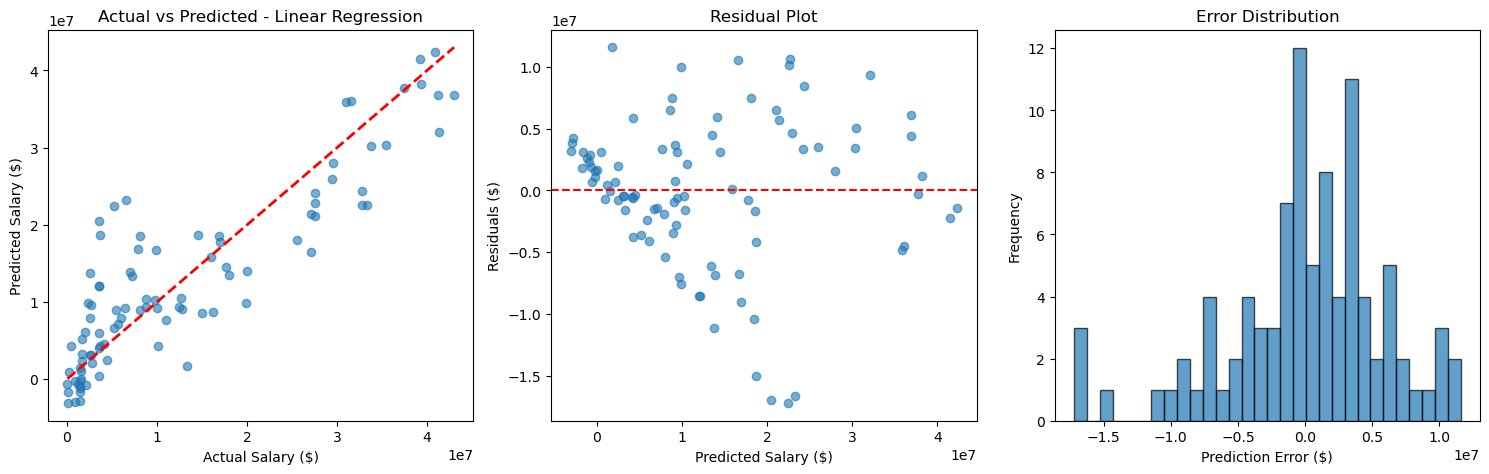


ADDITIONAL INSIGHTS:
Average player salary: $10,325,450.11
MAE as % of average salary: 43.2%
Range of salaries: $50,000.00 - $45,780,966.00


In [20]:
# Enhanced version with visualizations
def plot_regression_results(y_true, y_pred, model_name="Linear Regression"):
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Actual vs Predicted
    plt.subplot(1, 3, 1)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Salary ($)')
    plt.ylabel('Predicted Salary ($)')
    plt.title(f'Actual vs Predicted - {model_name}')
    
    # Plot 2: Residuals
    residuals = y_true - y_pred
    plt.subplot(1, 3, 2)
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Salary ($)')
    plt.ylabel('Residuals ($)')
    plt.title('Residual Plot')
    
    # Plot 3: Error distribution
    plt.subplot(1, 3, 3)
    plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel('Prediction Error ($)')
    plt.ylabel('Frequency')
    plt.title('Error Distribution')
    
    plt.tight_layout()
    plt.show()

# Run the enhanced analysis
print("Linear Regression Model Summary:")
print("=" * 50)
print(f"Intercept: ${lr_model.intercept_:,.2f}")
print(f"Number of features: {X.shape[1]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Generate visualizations
plot_regression_results(y_test, y_pred)

# Additional insights
print("\nADDITIONAL INSIGHTS:")
print("=" * 30)
print(f"Average player salary: ${y.mean():,.2f}")
print(f"MAE as % of average salary: {(mae / y.mean()) * 100:.1f}%")
print(f"Range of salaries: ${y.min():,.2f} - ${y.max():,.2f}")

## 3.1. Checking y_test and y_pred

- Checking the graph tells us the there is indeed a Linear relationship between the tested values and the predicted values.

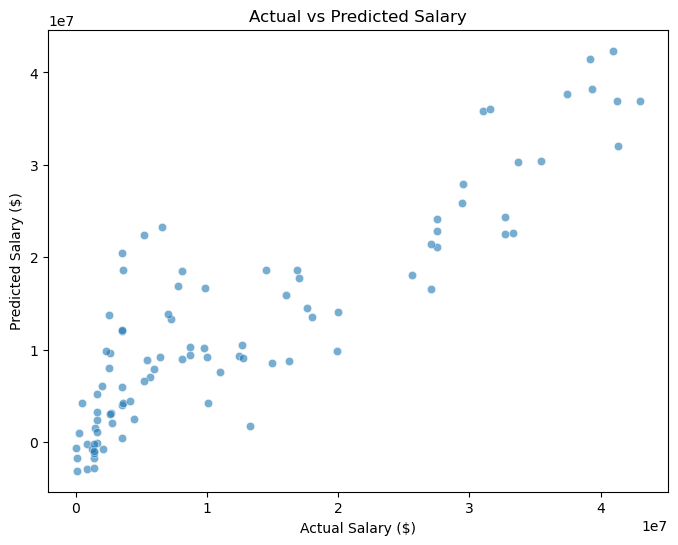

In [ ]:
# Plotting y_test vs y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, palette='viridis')
plt.xlabel('Actual Salary ($)')
plt.ylabel('Predicted Salary ($)')
plt.title('Actual vs Predicted Salary')
plt.show()

## 3.2. Checking the residuals

<Figure size 800x600 with 0 Axes>

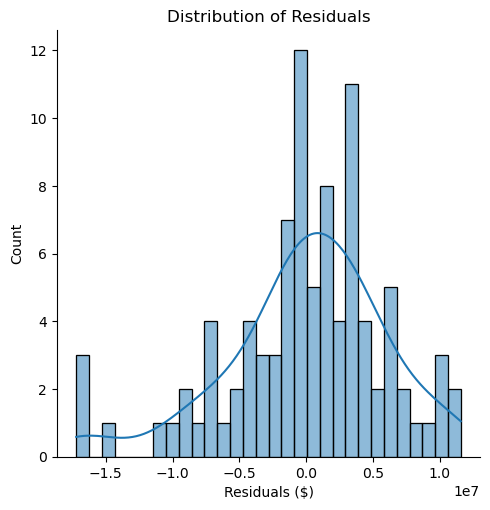

In [ ]:
#Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.displot(residuals, bins=30, kde=True)
plt.xlabel('Residuals ($)')
plt.title('Distribution of Residuals')
plt.show()